# **Modelling**

## Importing necessary libraries

In [33]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df= pd.read_excel('finaldata1.xlsx')

In [35]:
df

,Break_Out,Break_Out_Category,Data_Value_Alt,Data_Value_Unit,HighConfidenceLimit,LocationAbbr,LowConfidenceLimit,Topic,Year
0,Other,Race,5.2,Percent (%),5.3,US,5.1,Heart Failure,2006
1,Other,Race,5.1,Percent (%),5.2,US,5.1,Heart Failure,2005
2,65+,Age,8.5,Percent (%),8.5,US,8.4,Coronary Heart Disease,2007
3,Female,Gender,5.1,Percent (%),5.1,US,5.1,Coronary Heart Disease,2008
4,Overall,Overall,6.1,Percent (%),6.1,US,6.1,Heart Failure,2004
...,...,...,...,...,...,...,...,...,...
41633,Other,Race,4.0,Percent (%),4.4,OK,3.7,Stroke,2010
41634,Male,Gender,3.7,Percent (%),3.9,CO,3.6,Stroke,2012
41635,Female,Gender,3.4,Percent (%),3.5,MI,3.3,Stroke,2010
41636,Non-Hispanic White,Race,4.5,Percent (%),4.7,ID,4.3,Stroke,2013


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41638 entries, 0 to 41637
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Break_Out            41638 non-null  object 
 1   Break_Out_Category   41638 non-null  object 
 2   Data_Value_Alt       41638 non-null  float64
 3   Data_Value_Unit      41638 non-null  object 
 4   HighConfidenceLimit  41638 non-null  float64
 5   LocationAbbr         41638 non-null  object 
 6   LowConfidenceLimit   41638 non-null  float64
 7   Topic                41638 non-null  object 
 8   Year                 41638 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 2.9+ MB


In [37]:
for attribute in df.columns:
    if df[attribute].dtype == object:
        df[attribute] = df[attribute].astype('category')
df['Year'] = df['Year'].astype('category')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41638 entries, 0 to 41637
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Break_Out            41638 non-null  category
 1   Break_Out_Category   41638 non-null  category
 2   Data_Value_Alt       41638 non-null  float64 
 3   Data_Value_Unit      41638 non-null  category
 4   HighConfidenceLimit  41638 non-null  float64 
 5   LocationAbbr         41638 non-null  category
 6   LowConfidenceLimit   41638 non-null  float64 
 7   Topic                41638 non-null  category
 8   Year                 41638 non-null  category
dtypes: category(6), float64(3)
memory usage: 1.2 MB


In [39]:
cat_atr = df.select_dtypes(include='category').columns

In [40]:
numericDF = df.select_dtypes(include=[np.number])

### **Encoding**

##### *Binarization*

In [41]:
cat_attributes = list(df.select_dtypes(include = ['category']).columns)
cat_attributes.remove('Topic')
cat_attributes.remove('Year')
df2 = pd.get_dummies(df, columns = cat_attributes)
new_attr_list = list(df2.columns)
new_attr_list.remove('Topic')
df2 = df2[new_attr_list]

In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_en = OrdinalEncoder()
df2['Year'] = ordinal_en.fit_transform(df2[['Year']])

In [43]:
df["Topic"].value_counts()

Topic
Heart Failure                                 18872
Major Cardiovascular Disease                   4654
Diseases of the Heart (Heart Disease)          4642
Acute Myocardial Infarction (Heart Attack)     4517
Coronary Heart Disease                         4496
Stroke                                         4457
Name: count, dtype: int64

In [44]:
df['Topic'] = df['Topic'].replace({"Heart Failure": 0, "Major Cardiovascular Disease": 1, "Diseases of the Heart (Heart Disease)": 2, "Coronary Heart Disease": 3, "Acute Myocardial Infarction (Heart Attack)": 4, "Stroke": 5})

In [45]:
df

,Break_Out,Break_Out_Category,Data_Value_Alt,Data_Value_Unit,HighConfidenceLimit,LocationAbbr,LowConfidenceLimit,Topic,Year
0,Other,Race,5.2,Percent (%),5.3,US,5.1,0,2006
1,Other,Race,5.1,Percent (%),5.2,US,5.1,0,2005
2,65+,Age,8.5,Percent (%),8.5,US,8.4,3,2007
3,Female,Gender,5.1,Percent (%),5.1,US,5.1,3,2008
4,Overall,Overall,6.1,Percent (%),6.1,US,6.1,0,2004
...,...,...,...,...,...,...,...,...,...
41633,Other,Race,4.0,Percent (%),4.4,OK,3.7,5,2010
41634,Male,Gender,3.7,Percent (%),3.9,CO,3.6,5,2012
41635,Female,Gender,3.4,Percent (%),3.5,MI,3.3,5,2010
41636,Non-Hispanic White,Race,4.5,Percent (%),4.7,ID,4.3,5,2013


In [46]:
#df['Data_Value_Unit'] = df['Data_Value_Unit'].replace({"Percent (%)": 0, "Rate per 1,000": 1})

In [47]:
df.head()

,Break_Out,Break_Out_Category,Data_Value_Alt,Data_Value_Unit,HighConfidenceLimit,LocationAbbr,LowConfidenceLimit,Topic,Year
0,Other,Race,5.2,Percent (%),5.3,US,5.1,0,2006
1,Other,Race,5.1,Percent (%),5.2,US,5.1,0,2005
2,65+,Age,8.5,Percent (%),8.5,US,8.4,3,2007
3,Female,Gender,5.1,Percent (%),5.1,US,5.1,3,2008
4,Overall,Overall,6.1,Percent (%),6.1,US,6.1,0,2004


### **Model Building**

In [48]:
#Importing necessary libraries for model buiding

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

### **Split the Data**

In [49]:
#Splitting Dataset
x=df2
y=df['Topic']

In [50]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
seed = 12062024
test_size = .2
val_size = .2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [51]:
num_attribute = ['Data_Value_Alt','HighConfidenceLimit','LowConfidenceLimit']
index_numeric = []

for col in num_attribute:
    index_numeric.append(df2.columns.get_loc(col))

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Assuming index_numeric is a list of column indices
scaler.fit(x_train.iloc[:, index_numeric])
x_train.iloc[:, index_numeric] = scaler.transform(x_train.iloc[:, index_numeric])
x_test.iloc[:, index_numeric] = scaler.transform(x_test.iloc[:, index_numeric])
x_train

,Data_Value_Alt,HighConfidenceLimit,LowConfidenceLimit,Year,Break_Out_65+,Break_Out_75+,Break_Out_Female,Break_Out_Hispanic,Break_Out_Male,Break_Out_Non-Hispanic Black,...,LocationAbbr_TN,LocationAbbr_TX,LocationAbbr_US,LocationAbbr_UT,LocationAbbr_VA,LocationAbbr_VT,LocationAbbr_WA,LocationAbbr_WI,LocationAbbr_WV,LocationAbbr_WY
33535,0.867315,0.570646,1.108129,5.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27218,-0.579616,-0.555140,-0.519231,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28884,-0.669117,-0.582868,-0.667968,8.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27351,-0.303655,-0.239032,-0.370494,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36642,3.157047,2.278735,3.794147,5.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,0.658480,0.387637,0.906896,1.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9028,-0.922702,-0.810244,-0.904198,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14294,-0.564699,-0.538502,-0.501733,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14953,-0.557240,-0.488591,-0.562977,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [53]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)
print("Size of training set:", x_train.shape)
print("Size of test set:", x_val.shape)

Size of training set: (26648, 71)
Size of test set: (6662, 71)


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [55]:
models = []
models.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, random_state=seed)))
models.append(('SVM', SVC(kernel='linear', random_state=seed)))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, random_state=seed)))
#models.append(('GradientBoosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=seed)))
#models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
#models.append(('LogisticRegression', LogisticRegression(random_state=seed)))



# evaluate each model in turn

for name, model in models:
    print(name)
    
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    
    print('Classification metrics: ')
    print(classification_report(y_val, y_val_pred))


C45
Classification metrics: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3009
           1       0.96      0.94      0.95       762
           2       0.93      0.95      0.94       770
           3       0.71      0.74      0.72       705
           4       0.85      0.83      0.84       690
           5       0.70      0.70      0.70       726

    accuracy                           0.87      6662
   macro avg       0.85      0.85      0.85      6662
weighted avg       0.88      0.87      0.88      6662

CART
Classification metrics: 
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3009
           1       0.96      0.95      0.95       762
           2       0.95      0.95      0.95       770
           3       0.73      0.74      0.73       705
           4       0.86      0.83      0.85       690
           5       0.72      0.71      0.71       726

    accuracy      

In [56]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
class_counts = Counter(y_train)
print("Class distribution before resampling:", class_counts)

max_class_count = class_counts[0]

sampling_strategy = {
    0: max_class_count,
    1: int(max_class_count * 0.505),
    2: int(max_class_count * 0.505),
    3: int(max_class_count * 0.505),
    4: int(max_class_count * 0.505),
    5: int(max_class_count * 0.505)
}
oversampler_2 = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=seed)
X_overSample, y_overSample = oversampler_2.fit_resample(x_train, y_train)

class_counts_resampled = Counter(y_overSample)
print("Class distribution after resampling:", class_counts_resampled)



Class distribution before resampling: Counter({0: 12129, 1: 2962, 2: 2960, 5: 2887, 4: 2871, 3: 2839})
Class distribution after resampling: Counter({0: 12129, 1: 6125, 3: 6125, 2: 6125, 4: 6125, 5: 6125})


In [57]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_overSample, y_overSample)
class_counts_resampled = Counter(y_resampled)
print("Class distribution after resampling:", class_counts_resampled)

Class distribution after resampling: Counter({0: 6125, 1: 6125, 2: 6125, 3: 6125, 4: 6125, 5: 6125})


In [59]:
models = []
models.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, random_state=seed)))
models.append(('SVM', SVC(kernel='linear', random_state=seed)))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, random_state=seed)))
#models.append(('GradientBoosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=seed)))
#models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
#models.append(('LogisticRegression', LogisticRegression(random_state=seed)))

metrics = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': []
}
#'Precision': [],
#'Recall': [],
# evaluate each model in turn

for name, model in models:
    print(name)
    
    model.fit(X_resampled, y_resampled)
    y_val_pred = model.predict(x_val)
    
    print('Classification metrics: ')
    print(classification_report(y_val, y_val_pred))
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_val, y_val_pred))
    #metrics['Precision'].append(precision_score(y_val, y_val_pred, average='macro'))
    #metrics['Recall'].append(recall_score(y_val, y_val_pred, average='macro'))
    metrics['F1 Score'].append(f1_score(y_val, y_val_pred, average='macro'))

C45
Classification metrics: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3009
           1       0.95      0.95      0.95       762
           2       0.94      0.94      0.94       770
           3       0.68      0.79      0.73       705
           4       0.85      0.87      0.86       690
           5       0.69      0.73      0.71       726

    accuracy                           0.87      6662
   macro avg       0.84      0.86      0.85      6662
weighted avg       0.88      0.87      0.87      6662

CART
Classification metrics: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3009
           1       0.96      0.96      0.96       762
           2       0.95      0.95      0.95       770
           3       0.68      0.77      0.72       705
           4       0.85      0.85      0.85       690
           5       0.68      0.75      0.71       726

    accuracy      

### **Model Evualation**

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

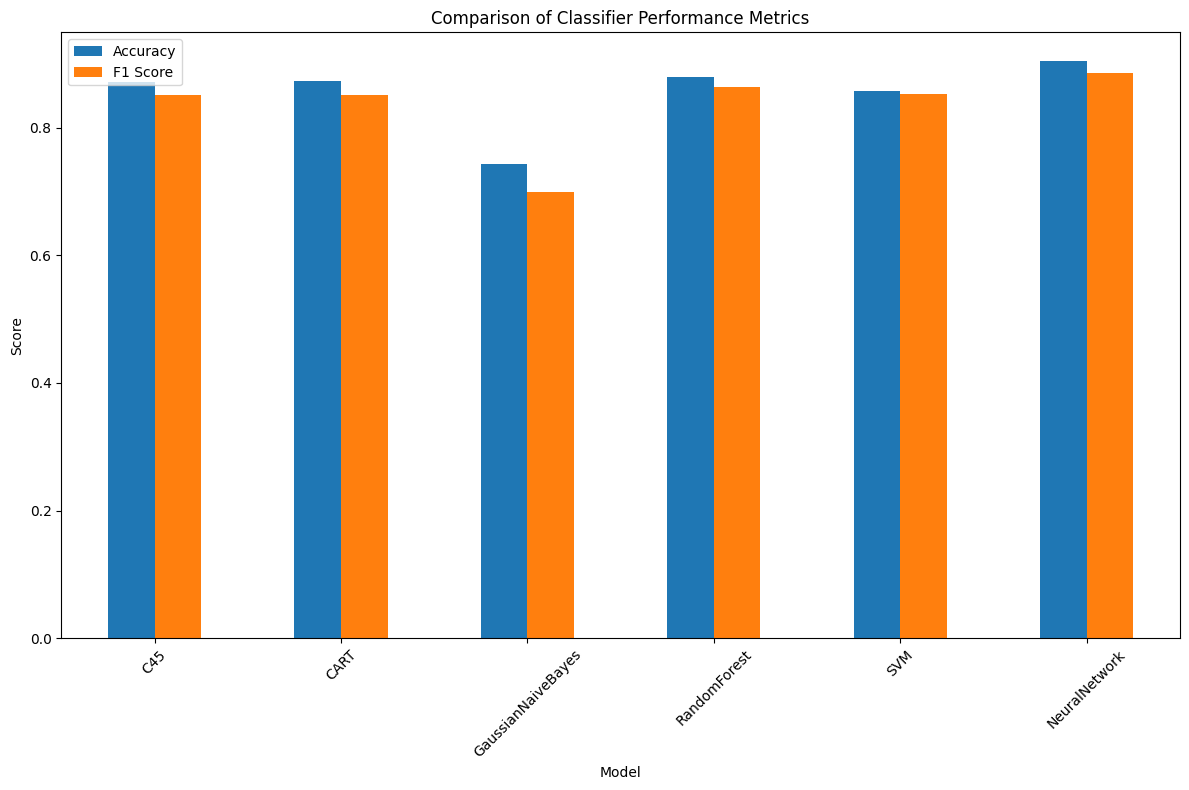

In [61]:
metrics_df = pd.DataFrame(metrics)

# Plot bar charts
fig, ax = plt.subplots(figsize=(12, 8))
metrics_df.set_index('Model').plot(kind='bar', ax=ax)
plt.title('Comparison of Classifier Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### **do predictions on test set**

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [63]:
model = MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, random_state=seed)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

Iteration 1, loss = 1.39477286
Iteration 2, loss = 0.83611489
Iteration 3, loss = 0.63484520
Iteration 4, loss = 0.53445289
Iteration 5, loss = 0.46500410
Iteration 6, loss = 0.42260690
Iteration 7, loss = 0.39469760
Iteration 8, loss = 0.37427007
Iteration 9, loss = 0.35789035
Iteration 10, loss = 0.34317147
Iteration 11, loss = 0.33293990
Iteration 12, loss = 0.32336347
Iteration 13, loss = 0.31381236
Iteration 14, loss = 0.30663860
Iteration 15, loss = 0.30147577
Iteration 16, loss = 0.29450268
Iteration 17, loss = 0.29039715
Iteration 18, loss = 0.28381504
Iteration 19, loss = 0.27876585
Iteration 20, loss = 0.27515824
Iteration 21, loss = 0.26909252
Iteration 22, loss = 0.26584281
Iteration 23, loss = 0.26177538
Iteration 24, loss = 0.25825364
Iteration 25, loss = 0.25508344
Iteration 26, loss = 0.25254405
Iteration 27, loss = 0.25000278
Iteration 28, loss = 0.24717850
Iteration 29, loss = 0.24470402
Iteration 30, loss = 0.24183682
Iteration 31, loss = 0.23907573
Iteration 32, los

In [64]:
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.90


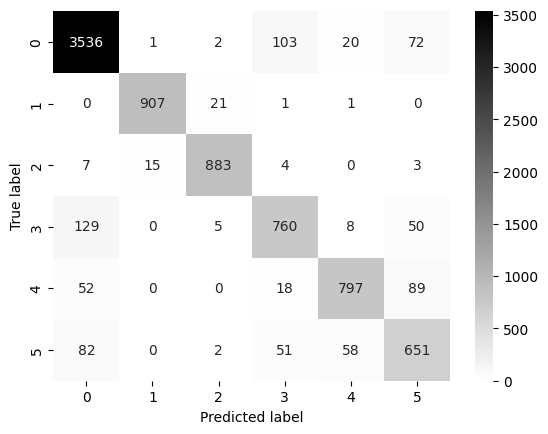

In [65]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(cf, categories=None, cbar=True, cmap='Blues', title=None):
    if categories is None:
        categories = [str(i) for i in range(cf.shape[0])]

    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if title:
        plt.title(title)
categories = [0, 1, 2, 3, 4,5]
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')